In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Исходные данные
np.random.seed(33)
w10 = np.random.uniform(0.01, 0.2)
w20 = np.random.uniform(0.01, 0.2)
r   = 0.0001#np.random.uniform(0.0001, 0.5)

# Обучающая выборка для диаграмм
draw_x1 = [
    -1.474977138,
    -1.496491185,
    0.303144721,
    14.22980036,
    11.92637661,
    8.565884038,
    11.43368811
]
draw_x2 = [
    6.120930076,
    5.919421109,
    4.023374463,
    5.336980731,
    6.752759218,
    6.242645143,
    7.669674787
]
draw_d = [
    1,
    1,
    1,
    -1,
    -1,
    -1,
    -1
]
# Обучающая выборка
train_x1 = [
    -1.474977138,
    11.43368811,
    -1.496491185,
    8.565884038,
    0.303144721,
    11.92637661,
    14.22980036
]
train_x2 = [
    6.120930076,
    7.669674787,
    5.919421109,
    6.242645143,
    4.023374463,
    6.752759218,
    5.336980731
]
train_d = [
    1,
    -1,
    1,
    -1,
    1,
    -1,
    -1
]
# Тестовая выборка
test_x1 = [
    12.94167716,
    11.37505205,
    11.62893684,
    0.495248152,
    11.01047222,
    11.20801473,
    12.26208881
]
test_x2 = [
    7.07279079,
    11.97082013,
    10.47719032,
    4.956728078,
    7.102061097,
    4.393196016,
    8.461619596
]
test_d = [
    -1,
    -1,
    -1,
    1,
    -1,
    -1,
    -1,
]
w1_opt = -0.144734843481693
w2_opt = -0.043506621574561

# Лист 1

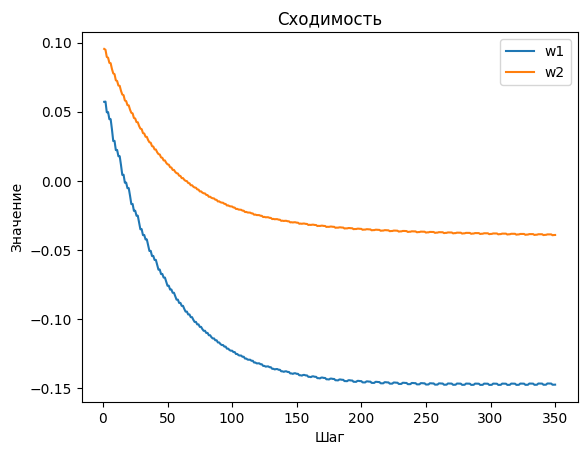

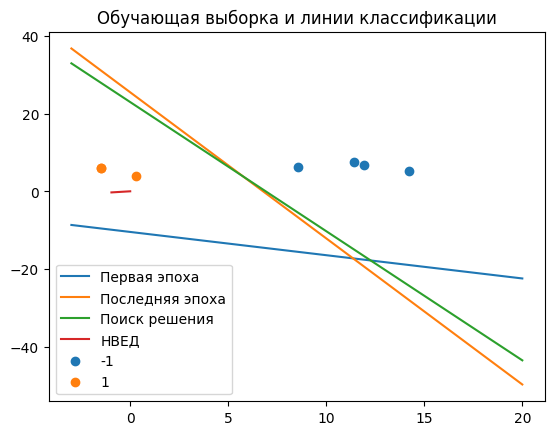

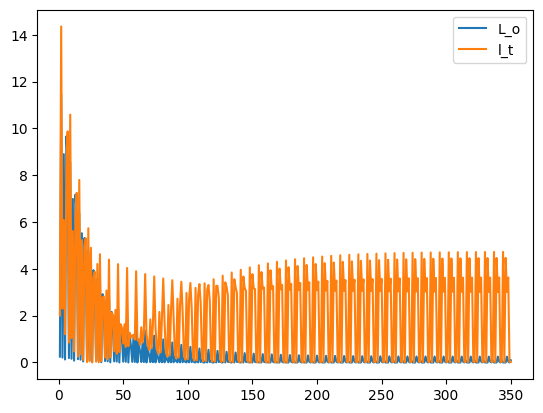

In [3]:
epochs = 50
last_ind = epochs*len(test_x1)-1
# Обучающая выборка
l1_data_sample_x1        = [0]*epochs*len(test_x1)
l1_data_sample_x2        = [0]*epochs*len(test_x1)
l1_data_sample_d         = [0]*epochs*len(test_x1)
l1_data_sample_wx        = [0]*epochs*len(test_x1)
l1_data_sample_dminysqrt = [0]*epochs*len(test_x1)
l1_data_sample_test_x1   = [0]*epochs*len(test_x1)
l1_data_sample_test_x2   = [0]*epochs*len(test_x1)
l1_data_sample_test_d    = [0]*epochs*len(test_x1)
# Алгоритм с постоянным параметром шага (r)
l1_w1                    = [0]*epochs*len(test_x1)
l1_w2                    = [0]*epochs*len(test_x1)
l1_wx                    = [0]*epochs*len(test_x1)
l1_dL_w1                 = [0]*epochs*len(test_x1)
l1_dL_w2                 = [0]*epochs*len(test_x1)
l1_r                     = [0]*epochs*len(test_x1)
l1_L_o                   = [0]*epochs*len(test_x1)
l1_l_t                   = [0]*epochs*len(test_x1)

for i in range(0, epochs):
    for j in range(0, len(test_x1)):
        ind = i*len(test_x1) + j
        # Обучающая выборка
        l1_data_sample_x1[ind]        = train_x1[j]
        l1_data_sample_x2[ind]        = train_x2[j]
        l1_data_sample_d[ind]         = train_d[j]
        l1_data_sample_wx[ind]        = l1_data_sample_x1[ind]*w1_opt+l1_data_sample_x2[ind]*w2_opt+1
        l1_data_sample_dminysqrt[ind] = (l1_data_sample_wx[ind]-l1_data_sample_d[ind])**2
        l1_data_sample_test_x1[ind]   = test_x1[j]
        l1_data_sample_test_x2[ind]   = test_x2[j]
        l1_data_sample_test_d[ind]    = test_d[j]
        # Алгоритм с постоянным параметром шага (r)
        l1_w1[ind]    = w10 if ind == 0 else l1_w1[ind-1]-l1_r[ind-1]*l1_dL_w1[ind-1]
        l1_w2[ind]    = w20 if ind == 0 else l1_w2[ind-1]-l1_r[ind-1]*l1_dL_w2[ind-1]
        l1_wx[ind]    = l1_data_sample_x1[ind]*l1_w1[ind]+l1_data_sample_x2[ind]*l1_w2[ind]+1
        l1_dL_w1[ind] = -2*l1_data_sample_x1[ind]*(l1_data_sample_d[ind]-l1_wx[ind])
        l1_dL_w2[ind] = -2*l1_data_sample_x2[ind]*(l1_data_sample_d[ind]-l1_wx[ind])
        l1_r[ind]     = r
        l1_L_o[ind]   = (l1_data_sample_d[ind]-(l1_data_sample_x1[ind]*l1_w1[ind]+l1_data_sample_x2[ind]*l1_w2[ind]+1))**2
        l1_l_t[ind]   = (l1_data_sample_d[ind]-(l1_data_sample_test_x1[ind]*l1_w1[ind]+l1_data_sample_test_x2[ind]*l1_w2[ind]+1))**2
        

iterations = list(range(1,epochs*len(test_x1)+1))
plt.plot(iterations, l1_w1, label='w1')
plt.plot(iterations, l1_w2, label='w2')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.title('Сходимость')
plt.legend()

plt.figure()
plt.plot([-3, 20], [-1/l1_w2[0]-l1_w1[0]/l1_w2[0]*(-3),-1/l1_w2[0]-l1_w1[0]/l1_w2[0]*(20)], label='Первая эпоха')
plt.plot([-3, 20], [-1/l1_w2[last_ind]-l1_w1[last_ind]/l1_w2[last_ind]*(-3),-1/l1_w2[last_ind]-l1_w1[last_ind]/l1_w2[last_ind]*(20)], label='Последняя эпоха')
plt.plot([-3, 20], [-1/w2_opt-w1_opt/w2_opt*(-3),-1/w2_opt-w1_opt/w2_opt*(20)], label='Поиск решения')
plt.plot([0, w1_opt/np.sqrt(w1_opt**2 + w2_opt**2)], [0,w2_opt/np.sqrt(w1_opt**2 + w2_opt**2)], label='НВЕД')
x1_min_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x2_min_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x1_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == 1]
x2_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == 1]
plt.scatter(x1_min_filtered, x2_min_filtered, label='-1')
plt.scatter(x1_filtered, x2_filtered, label='1')
plt.title('Обучающая выборка и линии классификации')
plt.legend()

plt.figure()
plt.plot(iterations, l1_L_o, label='L_o')
plt.plot(iterations, l1_l_t, label='l_t')
plt.legend()


plt.show()

# Лист 2

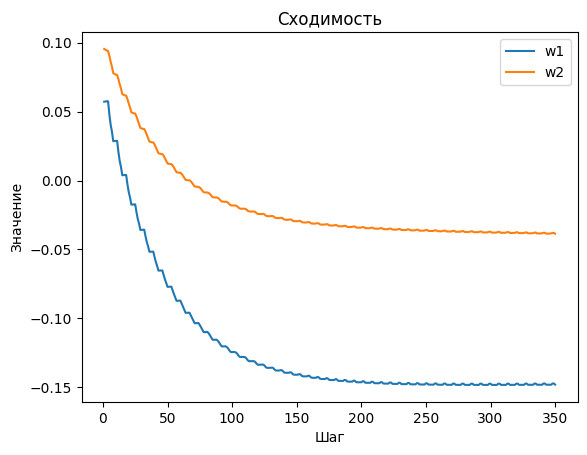

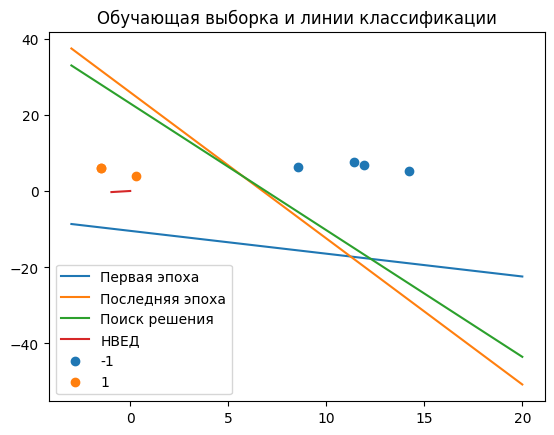

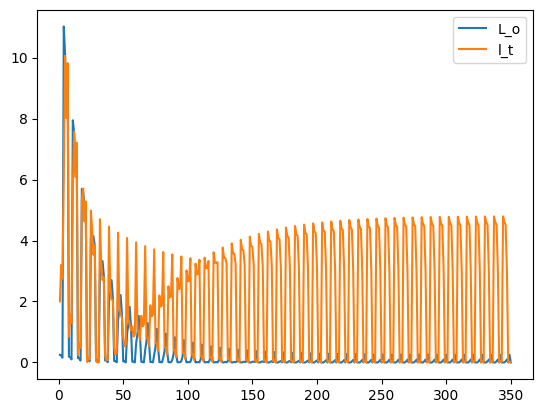

In [4]:
epochs = 50
last_ind = epochs*len(test_x1)-1
# Обучающая выборка
l2_data_sample_x1        = [0]*epochs*len(test_x1)
l2_data_sample_x2        = [0]*epochs*len(test_x1)
l2_data_sample_d         = [0]*epochs*len(test_x1)
l2_data_sample_wx        = [0]*epochs*len(test_x1)
l2_data_sample_dminysqrt = [0]*epochs*len(test_x1)
l2_data_sample_test_x1   = [0]*epochs*len(test_x1)
l2_data_sample_test_x2   = [0]*epochs*len(test_x1)
l2_data_sample_test_d    = [0]*epochs*len(test_x1)
# Алгоритм с постоянным параметром шага (r)
l2_w1                    = [0]*epochs*len(test_x1)
l2_w2                    = [0]*epochs*len(test_x1)
l2_wx                    = [0]*epochs*len(test_x1)
l2_dL_w1                 = [0]*epochs*len(test_x1)
l2_dL_w2                 = [0]*epochs*len(test_x1)
l2_r                     = [0]*epochs*len(test_x1)
l2_L_o                   = [0]*epochs*len(test_x1)
l2_l_t                   = [0]*epochs*len(test_x1)

for i in range(0, epochs):
    for j in range(0, len(test_x1)):
        ind = i*len(test_x1) + j
        # Обучающая выборка
        l2_data_sample_x1[ind]        = draw_x1[j]
        l2_data_sample_x2[ind]        = draw_x2[j]
        l2_data_sample_d[ind]         = draw_d[j]
        l2_data_sample_wx[ind]        = l2_data_sample_x1[ind]*w1_opt+l2_data_sample_x2[ind]*w2_opt+1
        l2_data_sample_dminysqrt[ind] = (l2_data_sample_wx[ind]-l2_data_sample_d[ind])**2
        l2_data_sample_test_x1[ind]   = test_x1[j]
        l2_data_sample_test_x2[ind]   = test_x2[j]
        l2_data_sample_test_d[ind]    = test_d[j]
        # Алгоритм с постоянным параметром шага (r)
        l2_w1[ind]    = w10 if ind == 0 else l2_w1[ind-1]-l2_r[ind-1]*l2_dL_w1[ind-1]
        l2_w2[ind]    = w20 if ind == 0 else l2_w2[ind-1]-l2_r[ind-1]*l2_dL_w2[ind-1]
        l2_wx[ind]    = l2_data_sample_x1[ind]*l2_w1[ind]+l2_data_sample_x2[ind]*l2_w2[ind]+1
        l2_dL_w1[ind] = -2*l2_data_sample_x1[ind]*(l2_data_sample_d[ind]-l2_wx[ind])
        l2_dL_w2[ind] = -2*l2_data_sample_x2[ind]*(l2_data_sample_d[ind]-l2_wx[ind])
        l2_r[ind]     = r
        l2_L_o[ind]   = (l2_data_sample_d[ind]-(l2_data_sample_x1[ind]*l2_w1[ind]+l2_data_sample_x2[ind]*l2_w2[ind]+1))**2
        l2_l_t[ind]   = (l2_data_sample_d[ind]-(l2_data_sample_test_x1[ind]*l2_w1[ind]+l2_data_sample_test_x2[ind]*l2_w2[ind]+1))**2
        

iterations = list(range(1,epochs*len(test_x1)+1))
plt.plot(iterations, l2_w1, label='w1')
plt.plot(iterations, l2_w2, label='w2')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.title('Сходимость')
plt.legend()

plt.figure()
plt.plot([-3, 20], [-1/l2_w2[0]-l2_w1[0]/l2_w2[0]*(-3),-1/l2_w2[0]-l2_w1[0]/l2_w2[0]*(20)], label='Первая эпоха')
plt.plot([-3, 20], [-1/l2_w2[last_ind]-l2_w1[last_ind]/l2_w2[last_ind]*(-3),-1/l2_w2[last_ind]-l2_w1[last_ind]/l2_w2[last_ind]*(20)], label='Последняя эпоха')
plt.plot([-3, 20], [-1/w2_opt-w1_opt/w2_opt*(-3),-1/w2_opt-w1_opt/w2_opt*(20)], label='Поиск решения')
plt.plot([0, w1_opt/np.sqrt(w1_opt**2 + w2_opt**2)], [0,w2_opt/np.sqrt(w1_opt**2 + w2_opt**2)], label='НВЕД')
x1_min_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x2_min_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x1_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == 1]
x2_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == 1]
plt.scatter(x1_min_filtered, x2_min_filtered, label='-1')
plt.scatter(x1_filtered, x2_filtered, label='1')
plt.title('Обучающая выборка и линии классификации')
plt.legend()

plt.figure()
plt.plot(iterations, l2_L_o, label='L_o')
plt.plot(iterations, l2_l_t, label='l_t')
plt.legend()


plt.show()

# Лист 3

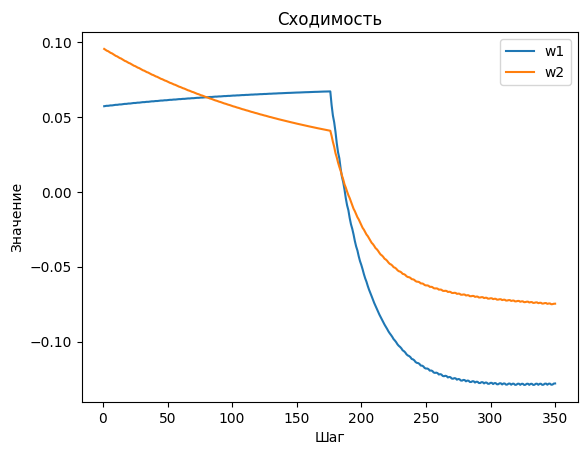

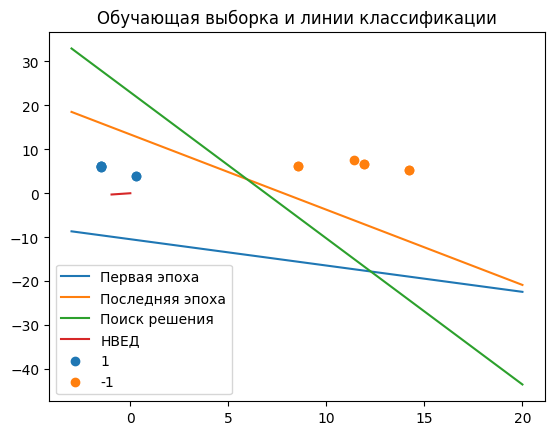

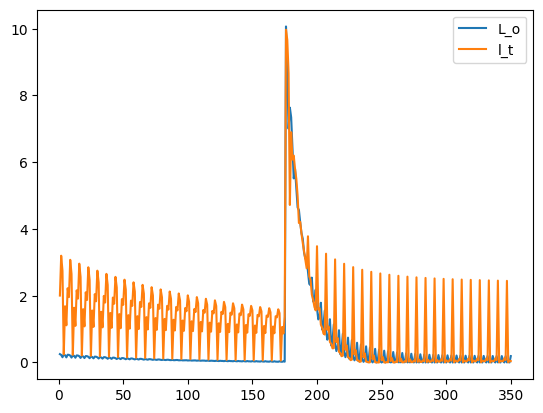

In [5]:
epochs = 50
last_ind = epochs*len(test_x1)-1
# Первые эпохи x
l3_1_x1 = [-1.474977138, -1.496491185, 0.303144721, -1.474977138, -1.496491185, 0.303144721,-1.474977138]
l3_2_x1 = [14.22980036, 11.92637661, 8.565884038, 11.43368811, 14.22980036, 11.92637661, 8.565884038]

l3_1_x2 = [6.120930076, 5.919421109, 4.023374463, 6.120930076, 5.919421109, 4.023374463, 6.120930076]
l3_2_x2 = [5.336980731, 6.752759218, 6.242645143, 7.669674787, 5.336980731, 6.752759218, 6.242645143]

l3_1_d = [1, 1, 1, 1, 1, 1, 1]
l3_2_d = [-1, -1, -1, -1, -1, -1,-1]

# Обучающая выборка
l3_data_sample_x1        = [0]*epochs*len(test_x1)
l3_data_sample_x2        = [0]*epochs*len(test_x1)
l3_data_sample_d         = [0]*epochs*len(test_x1)
l3_data_sample_wx        = [0]*epochs*len(test_x1)
l3_data_sample_dminysqrt = [0]*epochs*len(test_x1)
l3_data_sample_test_x1   = [0]*epochs*len(test_x1)
l3_data_sample_test_x2   = [0]*epochs*len(test_x1)
l3_data_sample_test_d    = [0]*epochs*len(test_x1)
# Алгоритм с постоянным параметром шага (r)
l3_w1                    = [0]*epochs*len(test_x1)
l3_w2                    = [0]*epochs*len(test_x1)
l3_wx                    = [0]*epochs*len(test_x1)
l3_dL_w1                 = [0]*epochs*len(test_x1)
l3_dL_w2                 = [0]*epochs*len(test_x1)
l3_r                     = [0]*epochs*len(test_x1)
l3_L_o                   = [0]*epochs*len(test_x1)
l3_l_t                   = [0]*epochs*len(test_x1)

for i in range(0, epochs):
    for j in range(0, len(test_x1)):
        ind = i*len(test_x1) + j
        # Обучающая выборка
        l3_data_sample_x1[ind]        = l3_1_x1[j] if i*2 < epochs else l3_2_x1[j]
        l3_data_sample_x2[ind]        = l3_1_x2[j] if i*2 < epochs else l3_2_x2[j]
        l3_data_sample_d[ind]         = l3_1_d[j] if i*2 < epochs else l3_2_d[j]
        l3_data_sample_wx[ind]        = l3_data_sample_x1[ind]*w1_opt+l3_data_sample_x2[ind]*w2_opt+1
        l3_data_sample_dminysqrt[ind] = (l3_data_sample_wx[ind]-l3_data_sample_d[ind])**2
        l3_data_sample_test_x1[ind]   = test_x1[j]
        l3_data_sample_test_x2[ind]   = test_x2[j]
        l3_data_sample_test_d[ind]    = test_d[j]
        # Алгоритм с постоянным параметром шага (r)
        l3_w1[ind]    = w10 if ind == 0 else l3_w1[ind-1]-l3_r[ind-1]*l3_dL_w1[ind-1]
        l3_w2[ind]    = w20 if ind == 0 else l3_w2[ind-1]-l3_r[ind-1]*l3_dL_w2[ind-1]
        l3_wx[ind]    = l3_data_sample_x1[ind]*l3_w1[ind]+l3_data_sample_x2[ind]*l3_w2[ind]+1
        l3_dL_w1[ind] = -2*l3_data_sample_x1[ind]*(l3_data_sample_d[ind]-l3_wx[ind])
        l3_dL_w2[ind] = -2*l3_data_sample_x2[ind]*(l3_data_sample_d[ind]-l3_wx[ind])
        l3_r[ind]     = r
        l3_L_o[ind]   = (l3_data_sample_d[ind]-(l3_data_sample_x1[ind]*l3_w1[ind]+l3_data_sample_x2[ind]*l3_w2[ind]+1))**2
        l3_l_t[ind]   = (l3_data_sample_d[ind]-(l3_data_sample_test_x1[ind]*l3_w1[ind]+l3_data_sample_test_x2[ind]*l3_w2[ind]+1))**2
        

iterations = list(range(1,epochs*len(test_x1)+1))
plt.plot(iterations, l3_w1, label='w1')
plt.plot(iterations, l3_w2, label='w2')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.title('Сходимость')
plt.legend()

plt.figure()
plt.plot([-3, 20], [-1/l3_w2[0]-l3_w1[0]/l3_w2[0]*(-3),-1/l3_w2[0]-l3_w1[0]/l3_w2[0]*(20)], label='Первая эпоха')
plt.plot([-3, 20], [-1/l3_w2[last_ind]-l3_w1[last_ind]/l3_w2[last_ind]*(-3),-1/l3_w2[last_ind]-l3_w1[last_ind]/l3_w2[last_ind]*(20)], label='Последняя эпоха')
plt.plot([-3, 20], [-1/w2_opt-w1_opt/w2_opt*(-3),-1/w2_opt-w1_opt/w2_opt*(20)], label='Поиск решения')
plt.plot([0, w1_opt/np.sqrt(w1_opt**2 + w2_opt**2)], [0,w2_opt/np.sqrt(w1_opt**2 + w2_opt**2)], label='НВЕД')
plt.scatter(l3_1_x1, l3_1_x2, label='1')
plt.scatter(l3_2_x1, l3_2_x2, label='-1')
plt.title('Обучающая выборка и линии классификации')
plt.legend()

plt.figure()
plt.plot(iterations, l3_L_o, label='L_o')
plt.plot(iterations, l3_l_t, label='l_t')
plt.legend()


plt.show()

# Лист 4

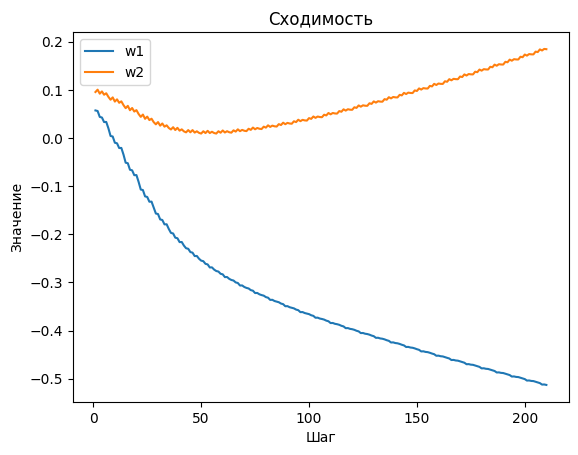

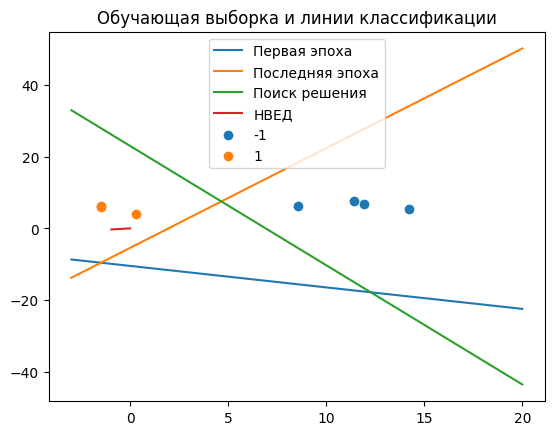

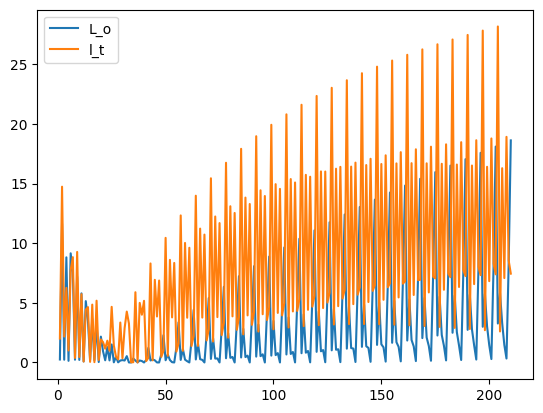

In [6]:
epochs = 30
last_ind = epochs*len(test_x1)-1
# Обучающая выборка
l4_data_sample_x1        = [0]*epochs*len(test_x1)
l4_data_sample_x2        = [0]*epochs*len(test_x1)
l4_data_sample_d         = [0]*epochs*len(test_x1)
l4_data_sample_wx        = [0]*epochs*len(test_x1)
l4_data_sample_dminysqrt = [0]*epochs*len(test_x1)
l4_data_sample_test_x1   = [0]*epochs*len(test_x1)
l4_data_sample_test_x2   = [0]*epochs*len(test_x1)
l4_data_sample_test_d    = [0]*epochs*len(test_x1)
# Алгоритм с постоянным параметром шага (r)
l4_w1                    = [0]*epochs*len(test_x1)
l4_w2                    = [0]*epochs*len(test_x1)
l4_wx                    = [0]*epochs*len(test_x1)
l4_dL_w1                 = [0]*epochs*len(test_x1)
l4_dL_w2                 = [0]*epochs*len(test_x1)
l4_r                     = [0]*epochs*len(test_x1)
l4_L_o                   = [0]*epochs*len(test_x1)
l4_l_t                   = [0]*epochs*len(test_x1)

for i in range(0, epochs):
    for j in range(0, len(test_x1)):
        ind = i*len(test_x1) + j
        # Обучающая выборка
        l4_data_sample_x1[ind]        = train_x1[j]
        l4_data_sample_x2[ind]        = train_x2[j]
        l4_data_sample_d[ind]         = train_d[j]
        l4_data_sample_wx[ind]        = l4_data_sample_x1[ind]*w1_opt+l4_data_sample_x2[ind]*w2_opt+1
        l4_data_sample_dminysqrt[ind] = (l4_data_sample_wx[ind]-l4_data_sample_d[ind])**2
        l4_data_sample_test_x1[ind]   = test_x1[j]
        l4_data_sample_test_x2[ind]   = test_x2[j]
        l4_data_sample_test_d[ind]    = test_d[j]
        # Алгоритм с постоянным параметром шага (r)
        l4_w1[ind]    = w10 if ind == 0 else l4_w1[ind-1]-l4_r[ind-1]*l4_dL_w1[ind-1]
        l4_w2[ind]    = w20 if ind == 0 else l4_w2[ind-1]-l4_r[ind-1]*l4_dL_w2[ind-1]
        l4_wx[ind]    = l4_data_sample_x1[ind]*l4_w1[ind]+l4_data_sample_x2[ind]*l4_w2[ind]+1
        l4_dL_w1[ind] = l4_data_sample_x1[ind]*(1-(1/(1+np.exp(l4_wx[ind])))**2)*(1/(1+np.exp(l4_wx[ind]))-l4_data_sample_d[ind])
        l4_dL_w2[ind] = l4_data_sample_x2[ind]*(1-(1/(1+np.exp(l4_wx[ind])))**2)*(1/(1+np.exp(l4_wx[ind]))-l4_data_sample_d[ind])
        l4_r[ind]     = 0.001
        l4_L_o[ind]   = (l4_data_sample_d[ind]-(l4_data_sample_x1[ind]*l4_w1[ind]+l4_data_sample_x2[ind]*l4_w2[ind]+1))**2
        l4_l_t[ind]   = (l4_data_sample_d[ind]-(l4_data_sample_test_x1[ind]*l4_w1[ind]+l4_data_sample_test_x2[ind]*l4_w2[ind]+1))**2
        

iterations = list(range(1,epochs*len(test_x1)+1))
plt.plot(iterations, l4_w1, label='w1')
plt.plot(iterations, l4_w2, label='w2')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.title('Сходимость')
plt.legend()

plt.figure()
plt.plot([-3, 20], [-1/l4_w2[0]-l4_w1[0]/l4_w2[0]*(-3),-1/l4_w2[0]-l4_w1[0]/l4_w2[0]*(20)], label='Первая эпоха')
plt.plot([-3, 20], [-1/l4_w2[last_ind]-l4_w1[last_ind]/l4_w2[last_ind]*(-3),-1/l4_w2[last_ind]-l4_w1[last_ind]/l4_w2[last_ind]*(20)], label='Последняя эпоха')
plt.plot([-3, 20], [-1/w2_opt-w1_opt/w2_opt*(-3),-1/w2_opt-w1_opt/w2_opt*(20)], label='Поиск решения')
plt.plot([0, w1_opt/np.sqrt(w1_opt**2 + w2_opt**2)], [0,w2_opt/np.sqrt(w1_opt**2 + w2_opt**2)], label='НВЕД')
x1_min_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x2_min_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x1_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == 1]
x2_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == 1]
plt.scatter(x1_min_filtered, x2_min_filtered, label='-1')
plt.scatter(x1_filtered, x2_filtered, label='1')
plt.title('Обучающая выборка и линии классификации')
plt.legend()

plt.figure()
plt.plot(iterations, l4_L_o, label='L_o')
plt.plot(iterations, l4_l_t, label='l_t')
plt.legend()


plt.show()

# Лист 5

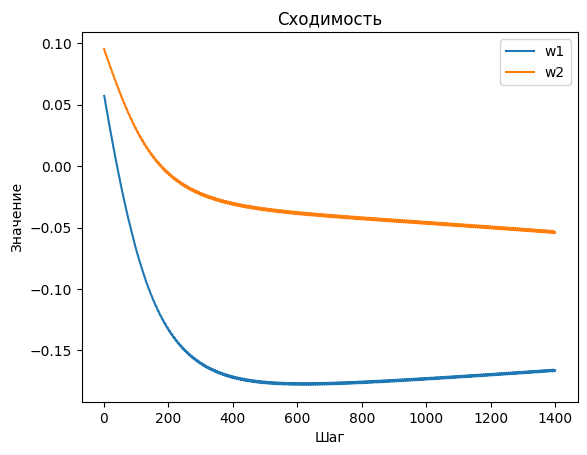

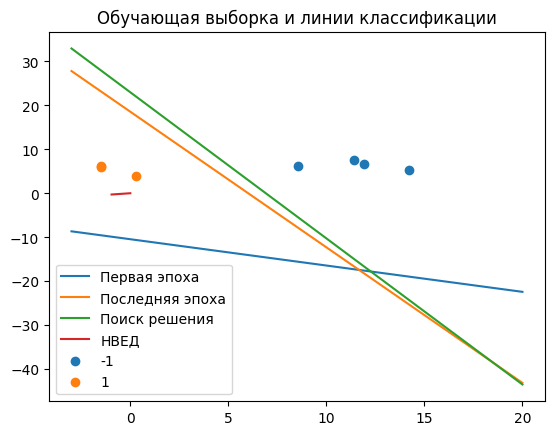

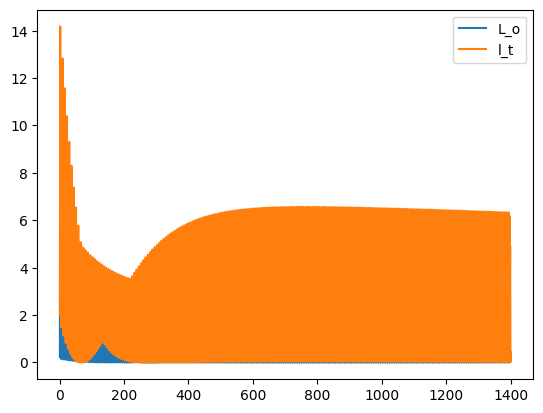

In [7]:
epochs = 200
last_ind = epochs*len(test_x1)-1
delta = 0.1
# Обучающая выборка
l5_data_sample_x1        = [0]*epochs*len(test_x1)
l5_data_sample_x2        = [0]*epochs*len(test_x1)
l5_data_sample_d         = [0]*epochs*len(test_x1)
l5_data_sample_wx        = [0]*epochs*len(test_x1)
l5_data_sample_dminysqrt = [0]*epochs*len(test_x1)
l5_data_sample_test_x1   = [0]*epochs*len(test_x1)
l5_data_sample_test_x2   = [0]*epochs*len(test_x1)
l5_data_sample_test_d    = [0]*epochs*len(test_x1)
# Алгоритм с постоянным параметром шага (r)
l5_w1                    = [0]*epochs*len(test_x1)
l5_w2                    = [0]*epochs*len(test_x1)
l5_wx                    = [0]*epochs*len(test_x1)
l5_dL_w1                 = [0]*epochs*len(test_x1)
l5_dL_w2                 = [0]*epochs*len(test_x1)
l5_r                     = [0]*epochs*len(test_x1)
l5_L_o                   = [0]*epochs*len(test_x1)
l5_l_t                   = [0]*epochs*len(test_x1)

for i in range(0, epochs):
    for j in range(0, len(test_x1)):
        ind = i*len(test_x1) + j
        # Обучающая выборка
        l5_data_sample_x1[ind]        = train_x1[j]
        l5_data_sample_x2[ind]        = train_x2[j]
        l5_data_sample_d[ind]         = train_d[j]
        l5_data_sample_wx[ind]        = l5_data_sample_x1[ind]*w1_opt+l5_data_sample_x2[ind]*w2_opt+1
        l5_data_sample_dminysqrt[ind] = (l5_data_sample_wx[ind]-l5_data_sample_d[ind])**2
        l5_data_sample_test_x1[ind]   = test_x1[j]
        l5_data_sample_test_x2[ind]   = test_x2[j]
        l5_data_sample_test_d[ind]    = test_d[j]
        # Алгоритм с постоянным параметром шага (r)
        l5_w1[ind]    = w10 if ind == 0 else l5_w1[ind-1]-l5_r[ind-1]*l5_dL_w1[ind-1]
        l5_w2[ind]    = w20 if ind == 0 else l5_w2[ind-1]-l5_r[ind-1]*l5_dL_w2[ind-1]
        l5_wx[ind]    = l5_data_sample_x1[ind]*l5_w1[ind]+l5_data_sample_x2[ind]*l5_w2[ind]+1
        l5_dL_w1[ind] = (-(2/(1+np.exp(l5_wx[ind]))-1-l5_data_sample_d[ind])+(2/(1+np.exp(-1-l5_data_sample_x1[ind]*(l5_w1[ind]+delta)-l5_data_sample_x2[ind]*l5_w2[ind]))-1-l5_data_sample_d[ind]))/delta
        l5_dL_w2[ind] = (-(2/(1+np.exp(l5_data_sample_wx[ind]))-1-l5_data_sample_d[ind])+(2/(1+np.exp(-1-l5_data_sample_x1[ind]*l5_w1[ind]-l5_data_sample_x2[ind]*(l5_w2[ind]+delta)))-1-l5_data_sample_d[ind]))/delta
        l5_r[ind]     = r
        l5_L_o[ind]   = (l5_data_sample_d[ind]-(l5_data_sample_x1[ind]*l5_w1[ind]+l5_data_sample_x2[ind]*l5_w2[ind]+1))**2
        l5_l_t[ind]   = (l5_data_sample_d[ind]-(l5_data_sample_test_x1[ind]*l5_w1[ind]+l5_data_sample_test_x2[ind]*l5_w2[ind]+1))**2
        

iterations = list(range(1,epochs*len(test_x1)+1))
plt.plot(iterations, l5_w1, label='w1')
plt.plot(iterations, l5_w2, label='w2')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.title('Сходимость')
plt.legend()

plt.figure()
plt.plot([-3, 20], [-1/l5_w2[0]-l5_w1[0]/l5_w2[0]*(-3),-1/l5_w2[0]-l5_w1[0]/l5_w2[0]*(20)], label='Первая эпоха')
plt.plot([-3, 20], [-1/l5_w2[last_ind]-l5_w1[last_ind]/l5_w2[last_ind]*(-3),-1/l5_w2[last_ind]-l5_w1[last_ind]/l5_w2[last_ind]*(20)], label='Последняя эпоха')
plt.plot([-3, 20], [-1/w2_opt-w1_opt/w2_opt*(-3),-1/w2_opt-w1_opt/w2_opt*(20)], label='Поиск решения')
plt.plot([0, w1_opt/np.sqrt(w1_opt**2 + w2_opt**2)], [0,w2_opt/np.sqrt(w1_opt**2 + w2_opt**2)], label='НВЕД')
x1_min_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x2_min_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x1_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == 1]
x2_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == 1]
plt.scatter(x1_min_filtered, x2_min_filtered, label='-1')
plt.scatter(x1_filtered, x2_filtered, label='1')
plt.title('Обучающая выборка и линии классификации')
plt.legend()

plt.figure()
plt.plot(iterations, l5_L_o, label='L_o')
plt.plot(iterations, l5_l_t, label='l_t')
plt.legend()


plt.show()

# Лист 6


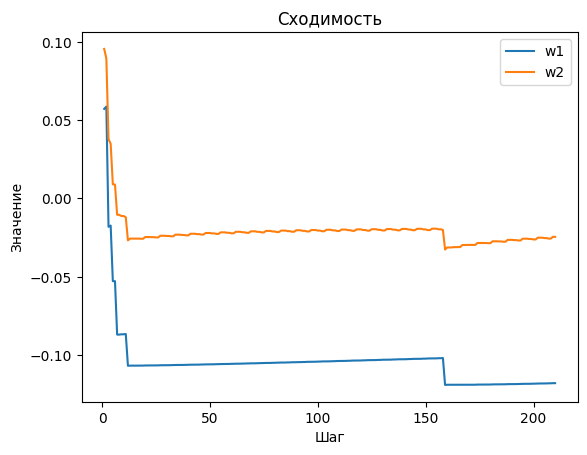

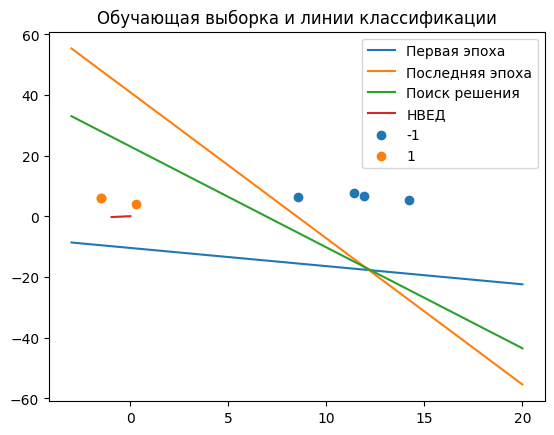

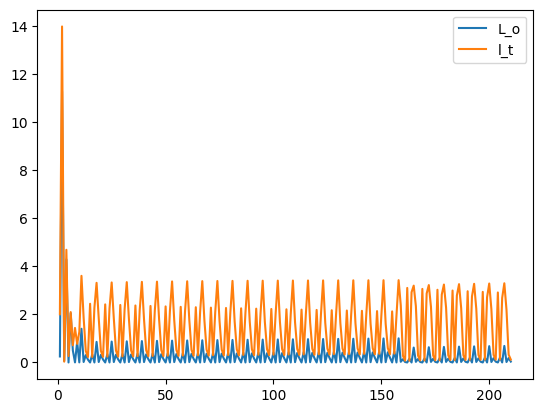

In [8]:
epochs = 30
last_ind = epochs*len(test_x1)-1
# Обучающая выборка
l6_data_sample_x1        = [0]*epochs*len(test_x1)
l6_data_sample_x2        = [0]*epochs*len(test_x1)
l6_data_sample_d         = [0]*epochs*len(test_x1)
l6_data_sample_wx        = [0]*epochs*len(test_x1)
l6_data_sample_dminysqrt = [0]*epochs*len(test_x1)
l6_data_sample_test_x1   = [0]*epochs*len(test_x1)
l6_data_sample_test_x2   = [0]*epochs*len(test_x1)
l6_data_sample_test_d    = [0]*epochs*len(test_x1)
# Алгоритм с постоянным параметром шага (r)
l6_w1                    = [0]*epochs*len(test_x1)
l6_w2                    = [0]*epochs*len(test_x1)
l6_wx                    = [0]*epochs*len(test_x1)
l6_dL_w1                 = [0]*epochs*len(test_x1)
l6_dL_w2                 = [0]*epochs*len(test_x1)
l6_r                     = [0]*epochs*len(test_x1)
l6_L_o                   = [0]*epochs*len(test_x1)
l6_l_t                   = [0]*epochs*len(test_x1)

for i in range(0, epochs):
    for j in range(0, len(test_x1)):
        ind = i*len(test_x1) + j
        # Обучающая выборка
        l6_data_sample_x1[ind]        = train_x1[j]
        l6_data_sample_x2[ind]        = train_x2[j]
        l6_data_sample_d[ind]         = train_d[j]
        l6_data_sample_wx[ind]        = l6_data_sample_x1[ind]*w1_opt+l6_data_sample_x2[ind]*w2_opt+1
        l6_data_sample_dminysqrt[ind] = (l6_data_sample_wx[ind]-l6_data_sample_d[ind])**2
        l6_data_sample_test_x1[ind]   = test_x1[j]
        l6_data_sample_test_x2[ind]   = test_x2[j]
        l6_data_sample_test_d[ind]    = test_d[j]
        # Алгоритм с постоянным параметром шага (r)
        l6_w1[ind]    = w10 if ind == 0 else l6_w1[ind-1]-l6_r[ind-1]*l6_dL_w1[ind-1]
        l6_w2[ind]    = w20 if ind == 0 else l6_w2[ind-1]-l6_r[ind-1]*l6_dL_w2[ind-1]
        l6_wx[ind]    = l6_data_sample_x1[ind]*l6_w1[ind]+l6_data_sample_x2[ind]*l6_w2[ind]+1
        l6_dL_w1[ind] = 0 if l6_wx[ind] <= 0 else 2*l6_data_sample_x1[ind]*(l6_wx[ind]-l6_data_sample_d[ind])
        l6_dL_w2[ind] = 0 if l6_wx[ind] <= 0 else 2*l6_data_sample_x2[ind]*(l6_wx[ind]-l6_data_sample_d[ind])
        l6_r[ind]     = 0.001
        l6_L_o[ind]   = (l6_data_sample_d[ind]-(l6_data_sample_x1[ind]*l6_w1[ind]+l6_data_sample_x2[ind]*l6_w2[ind]+1))**2
        l6_l_t[ind]   = (l6_data_sample_d[ind]-(l6_data_sample_test_x1[ind]*l6_w1[ind]+l6_data_sample_test_x2[ind]*l6_w2[ind]+1))**2
        

iterations = list(range(1,epochs*len(test_x1)+1))
plt.plot(iterations, l6_w1, label='w1')
plt.plot(iterations, l6_w2, label='w2')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.title('Сходимость')
plt.legend()

plt.figure()
plt.plot([-3, 20], [-1/l6_w2[0]-l6_w1[0]/l6_w2[0]*(-3),-1/l6_w2[0]-l6_w1[0]/l6_w2[0]*(20)], label='Первая эпоха')
plt.plot([-3, 20], [-1/l6_w2[last_ind]-l6_w1[last_ind]/l6_w2[last_ind]*(-3),-1/l6_w2[last_ind]-l6_w1[last_ind]/l6_w2[last_ind]*(20)], label='Последняя эпоха')
plt.plot([-3, 20], [-1/w2_opt-w1_opt/w2_opt*(-3),-1/w2_opt-w1_opt/w2_opt*(20)], label='Поиск решения')
plt.plot([0, w1_opt/np.sqrt(w1_opt**2 + w2_opt**2)], [0,w2_opt/np.sqrt(w1_opt**2 + w2_opt**2)], label='НВЕД')
x1_min_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x2_min_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == -1]
x1_filtered = [draw_x1[i] for i in range(len(draw_d)) if draw_d[i] == 1]
x2_filtered = [draw_x2[i] for i in range(len(draw_d)) if draw_d[i] == 1]
plt.scatter(x1_min_filtered, x2_min_filtered, label='-1')
plt.scatter(x1_filtered, x2_filtered, label='1')
plt.title('Обучающая выборка и линии классификации')
plt.legend()

plt.figure()
plt.plot(iterations, l6_L_o, label='L_o')
plt.plot(iterations, l6_l_t, label='l_t')
plt.legend()


plt.show()